In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score
from matplotlib_venn import venn2
import matplotlib
matplotlib.rcParams['figure.dpi'] = 500

In [2]:
training_results = pd.read_csv("../data/IDX/conversion_results_6495.csv")
training_results

,Unnamed: 0,Name,mz,rt_start,rt_end,Product mz,Charge,CE,Training,HRMS_CE,Converted_CE
0,0,cAMP,330.059796,1.78,3.57,136.1,1,24,1,40.0,24.265654
1,1,cAMP,330.059796,1.78,3.57,97.1,1,20,1,30.0,20.069464
2,2,cAMP,330.059796,1.78,3.57,312.0,1,16,1,25.0,17.971370
3,3,cAMP,330.059796,1.78,3.57,119.1,1,40,1,80.0,41.050412
4,4,Acetyl-CoA,810.133046,6.02,6.43,303.1,1,32,1,30.0,26.530719
5,5,Acetyl-CoA,810.133046,6.02,6.43,428.0,1,28,1,20.0,22.334530
6,6,Acetyl-CoA,810.133046,6.02,6.43,201.0,1,32,1,20.0,22.334530
7,7,Acetyl-CoA,810.133046,6.02,6.43,435.4,1,12,1,60.0,39.119288
8,8,Adenine,136.061776,2.18,3.22,119.1,1,24,1,40.0,21.654655
9,9,Adenine,136.061776,2.18,3.22,92.1,1,32,1,60.0,30.047034


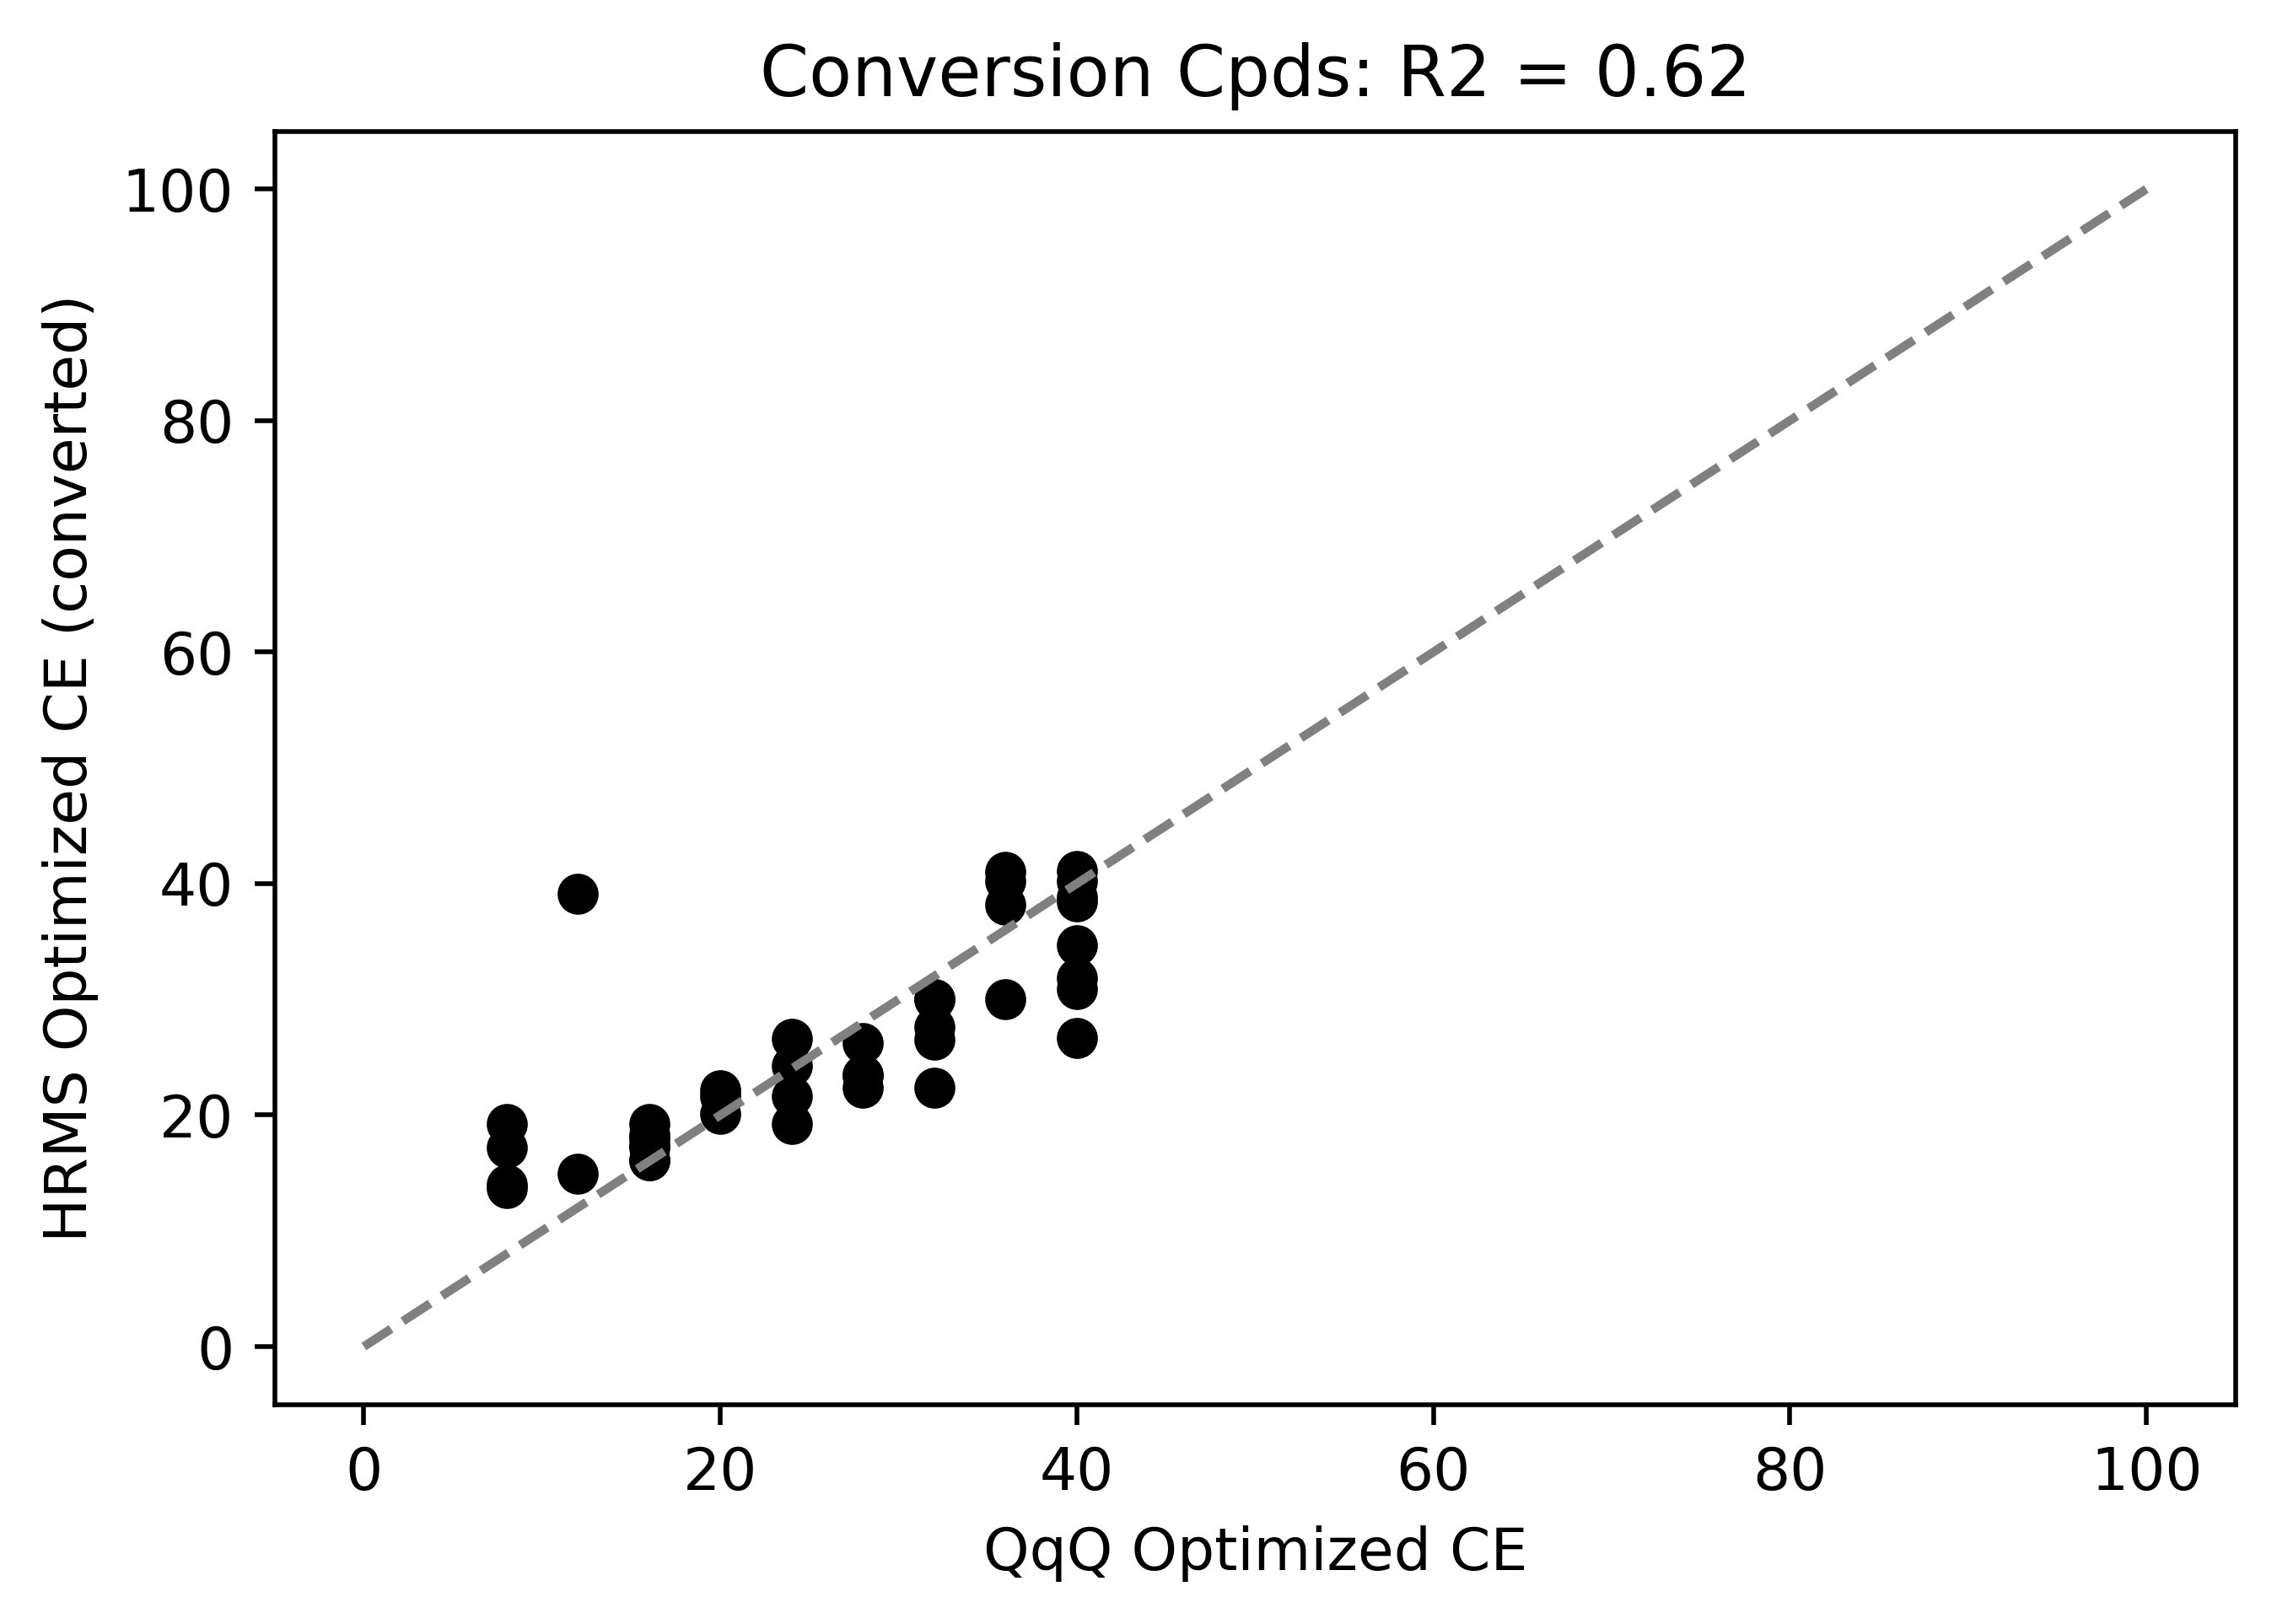

In [3]:
plt.scatter(training_results["CE"],training_results["Converted_CE"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(training_results["CE"],training_results["Converted_CE"])
plt.title("Conversion Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("training_scatter_6495.png")

In [4]:
totalTransitionInfoFn = "../data/IDX/6495_m3t_transitions.csv"
totalTransitions = pd.read_csv(totalTransitionInfoFn)
totalTransitions = totalTransitions[totalTransitions["Product mz"] > 50]
totalTransitions

,Name,mz,Product mz,rt_start,rt_end,CE,Charge,Training
0,Adenine,136.061776,119.0,2.18,3.22,24,1,1
1,Adenine,136.061776,118.9,2.18,3.22,24,1,1
2,Adenosine,268.104032,136.1,2.12,3.34,16,1,1
3,Adenosine,268.104032,119.0,2.12,3.34,40,1,1
4,cAMP,330.059796,312.1,1.78,3.57,16,1,1
...,...,...,...,...,...,...,...,...
128,Succinate,117.019334,98.9,6.59,7.01,8,-1,0
129,Succinate,117.019334,73.0,6.59,7.01,12,-1,0
131,Uridine,243.062264,200.0,2.81,3.67,8,-1,0
132,Uridine,243.062264,109.9,2.81,3.67,16,-1,0


In [5]:
resultData = pd.read_csv("../data/IDX/generated_SRM_table_6495.csv")
resultData

,Unnamed: 0,Name,rt_start,rt_end,mz,Charge,Product mz,CE,Normalized Intensity
0,0,Adenine,2.18,3.22,136.061776,1,119.03,25.850845,8.103957e+06
1,1,Adenine,2.18,3.22,136.061776,1,119.04,21.654655,6.099204e+06
2,2,Adenine,2.18,3.22,136.061776,1,92.02,30.047034,4.759605e+06
3,3,Adenine,2.18,3.22,136.061776,1,65.01,38.439413,3.983452e+06
4,4,Adenine,2.18,3.22,136.061776,1,67.03,30.047034,2.308646e+06
...,...,...,...,...,...,...,...,...,...
340,340,Uracil,1.84,2.53,113.034556,1,70.03,19.246640,3.634142e+03
341,341,Uracil,1.84,2.53,113.034556,1,95.06,12.952355,2.745215e+03
342,342,Uracil,1.84,2.53,113.034556,1,96.01,15.050450,2.363619e+03
343,343,Uracil,1.84,2.53,113.034556,1,84.08,25.540924,1.726087e+03


In [6]:
resultData_unconv = pd.read_csv("../data/IDX/generated_SRM_table_unconverted_6495.csv")
resultData_unconv = resultData_unconv[["CE"]]
resultData_unconv.columns = ["unconverted CE"]
resultData = pd.concat((resultData,resultData_unconv),axis=1,ignore_index=False)
resultData

,Unnamed: 0,Name,rt_start,rt_end,mz,Charge,Product mz,CE,Normalized Intensity,unconverted CE
0,0,Adenine,2.18,3.22,136.061776,1,119.03,25.850845,8.103957e+06,50.0
1,1,Adenine,2.18,3.22,136.061776,1,119.04,21.654655,6.099204e+06,40.0
2,2,Adenine,2.18,3.22,136.061776,1,92.02,30.047034,4.759605e+06,60.0
3,3,Adenine,2.18,3.22,136.061776,1,65.01,38.439413,3.983452e+06,80.0
4,4,Adenine,2.18,3.22,136.061776,1,67.03,30.047034,2.308646e+06,60.0
...,...,...,...,...,...,...,...,...,...,...
340,340,Uracil,1.84,2.53,113.034556,1,70.03,19.246640,3.634142e+03,35.0
341,341,Uracil,1.84,2.53,113.034556,1,95.06,12.952355,2.745215e+03,20.0
342,342,Uracil,1.84,2.53,113.034556,1,96.01,15.050450,2.363619e+03,25.0
343,343,Uracil,1.84,2.53,113.034556,1,84.08,25.540924,1.726087e+03,50.0


In [7]:
evalData = totalTransitions#[totalTransitions["Training"] < .5]
fragTol = .5

transition_indices = {}
for index,row in evalData.iterrows():
    new = True
    for index2,x in transition_indices.items():
        if x["Name"] == row["Name"] and np.abs(row["Product mz"] - x["Product mz"]) < fragTol and row["Charge"] == x["Charge"]:
            new = False
            transition_indices[index2]["QqQ Optimized CE"] = row["CE"]
            break
    if new:
        transition_indices[len(transition_indices)] = {"Name":row["Name"],"Product mz":row["Product mz"],"Charge":row["Charge"],"QqQ Optimized CE":row["CE"]}
        
for index,row in resultData.iterrows():
    if any((row["Name"],row["Charge"]) == (row2["Name"],row2["Charge"]) for _,row2 in evalData.iterrows()):
        new = True
        for index2,x in transition_indices.items():
            if x["Name"] == row["Name"] and np.abs(row["Product mz"] - x["Product mz"]) < fragTol and row["Charge"] == x["Charge"]:
                new = False
                transition_indices[index2]["HRMS Optimized CE (converted)"] = row["CE"]
                transition_indices[index2]["HRMS Optimized CE (unconverted)"] = row["unconverted CE"]
                break
        if new:
            transition_indices[len(transition_indices)] = {"Name":row["Name"],"Product mz":row["Product mz"],"Charge":row["Charge"],"HRMS Optimized CE (converted)":row["CE"],"HRMS Optimized CE (unconverted)":row["unconverted CE"]}
evaluation_results = pd.DataFrame.from_dict(transition_indices,orient="index")
evaluation_results

,Name,Product mz,Charge,QqQ Optimized CE,HRMS Optimized CE (converted),HRMS Optimized CE (unconverted)
0,Adenine,119.00,1,24.0,21.654655,40.0
1,Adenosine,136.10,1,16.0,19.235608,30.0
2,Adenosine,119.00,1,40.0,40.216556,80.0
3,cAMP,312.10,1,16.0,NaN,NaN
4,cAMP,135.90,1,24.0,24.265654,40.0
...,...,...,...,...,...,...
294,Serotonine,78.99,1,NaN,26.403204,50.0
295,Uracil,95.06,1,NaN,12.952355,20.0
296,Uracil,96.01,1,NaN,15.050450,25.0
297,Uracil,84.08,1,NaN,25.540924,50.0


102


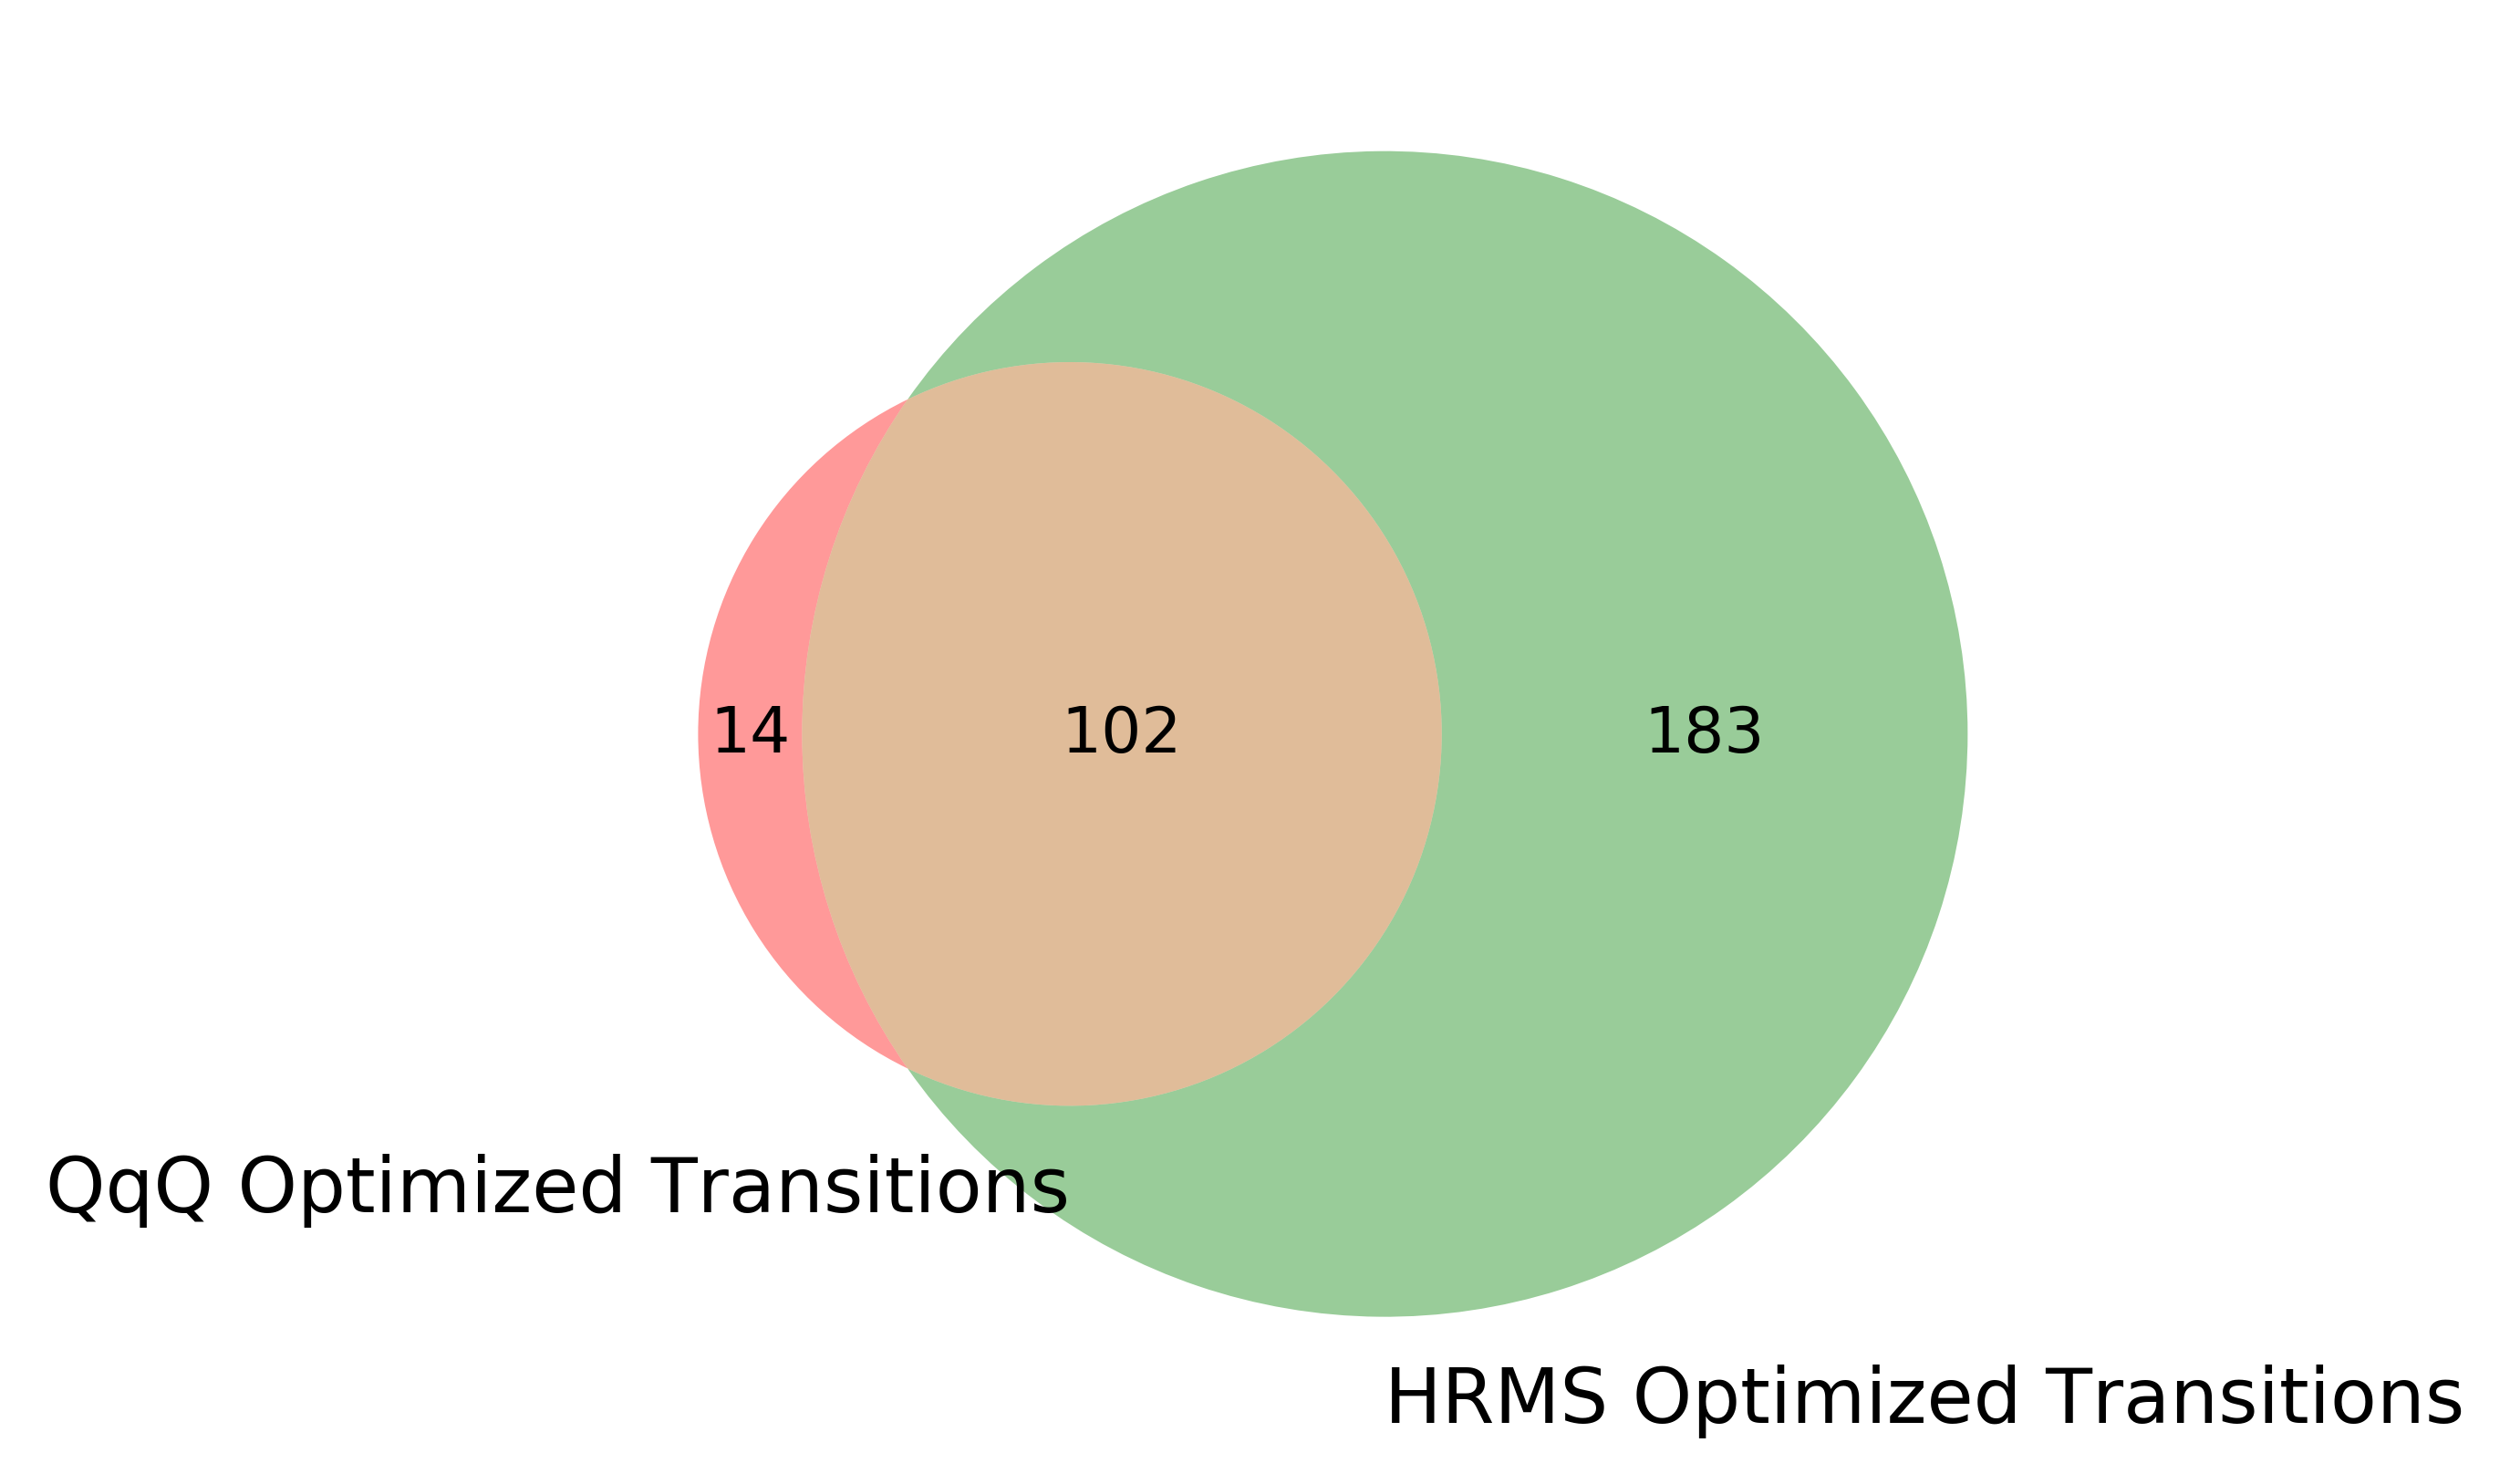

In [8]:
sharedInds = []
QqQ_trans = []
HRMS_trans = []

for index,row in evaluation_results.iterrows():
    if not (pd.isna(row["QqQ Optimized CE"]) or pd.isna(row["HRMS Optimized CE (converted)"])):
        sharedInds.append(index)
    if not pd.isna(row["QqQ Optimized CE"]):
        QqQ_trans.append(index)
    if not pd.isna(row["HRMS Optimized CE (converted)"]):
        HRMS_trans.append(index)
print(len(sharedInds))
filt = evaluation_results.loc[sharedInds,:]
filt.to_csv("combined_results_IDX_6495.csv")

venn2([set(QqQ_trans),set(HRMS_trans)],set_labels=["QqQ Optimized Transitions","HRMS Optimized Transitions"])
plt.savefig("venn_6495.png")

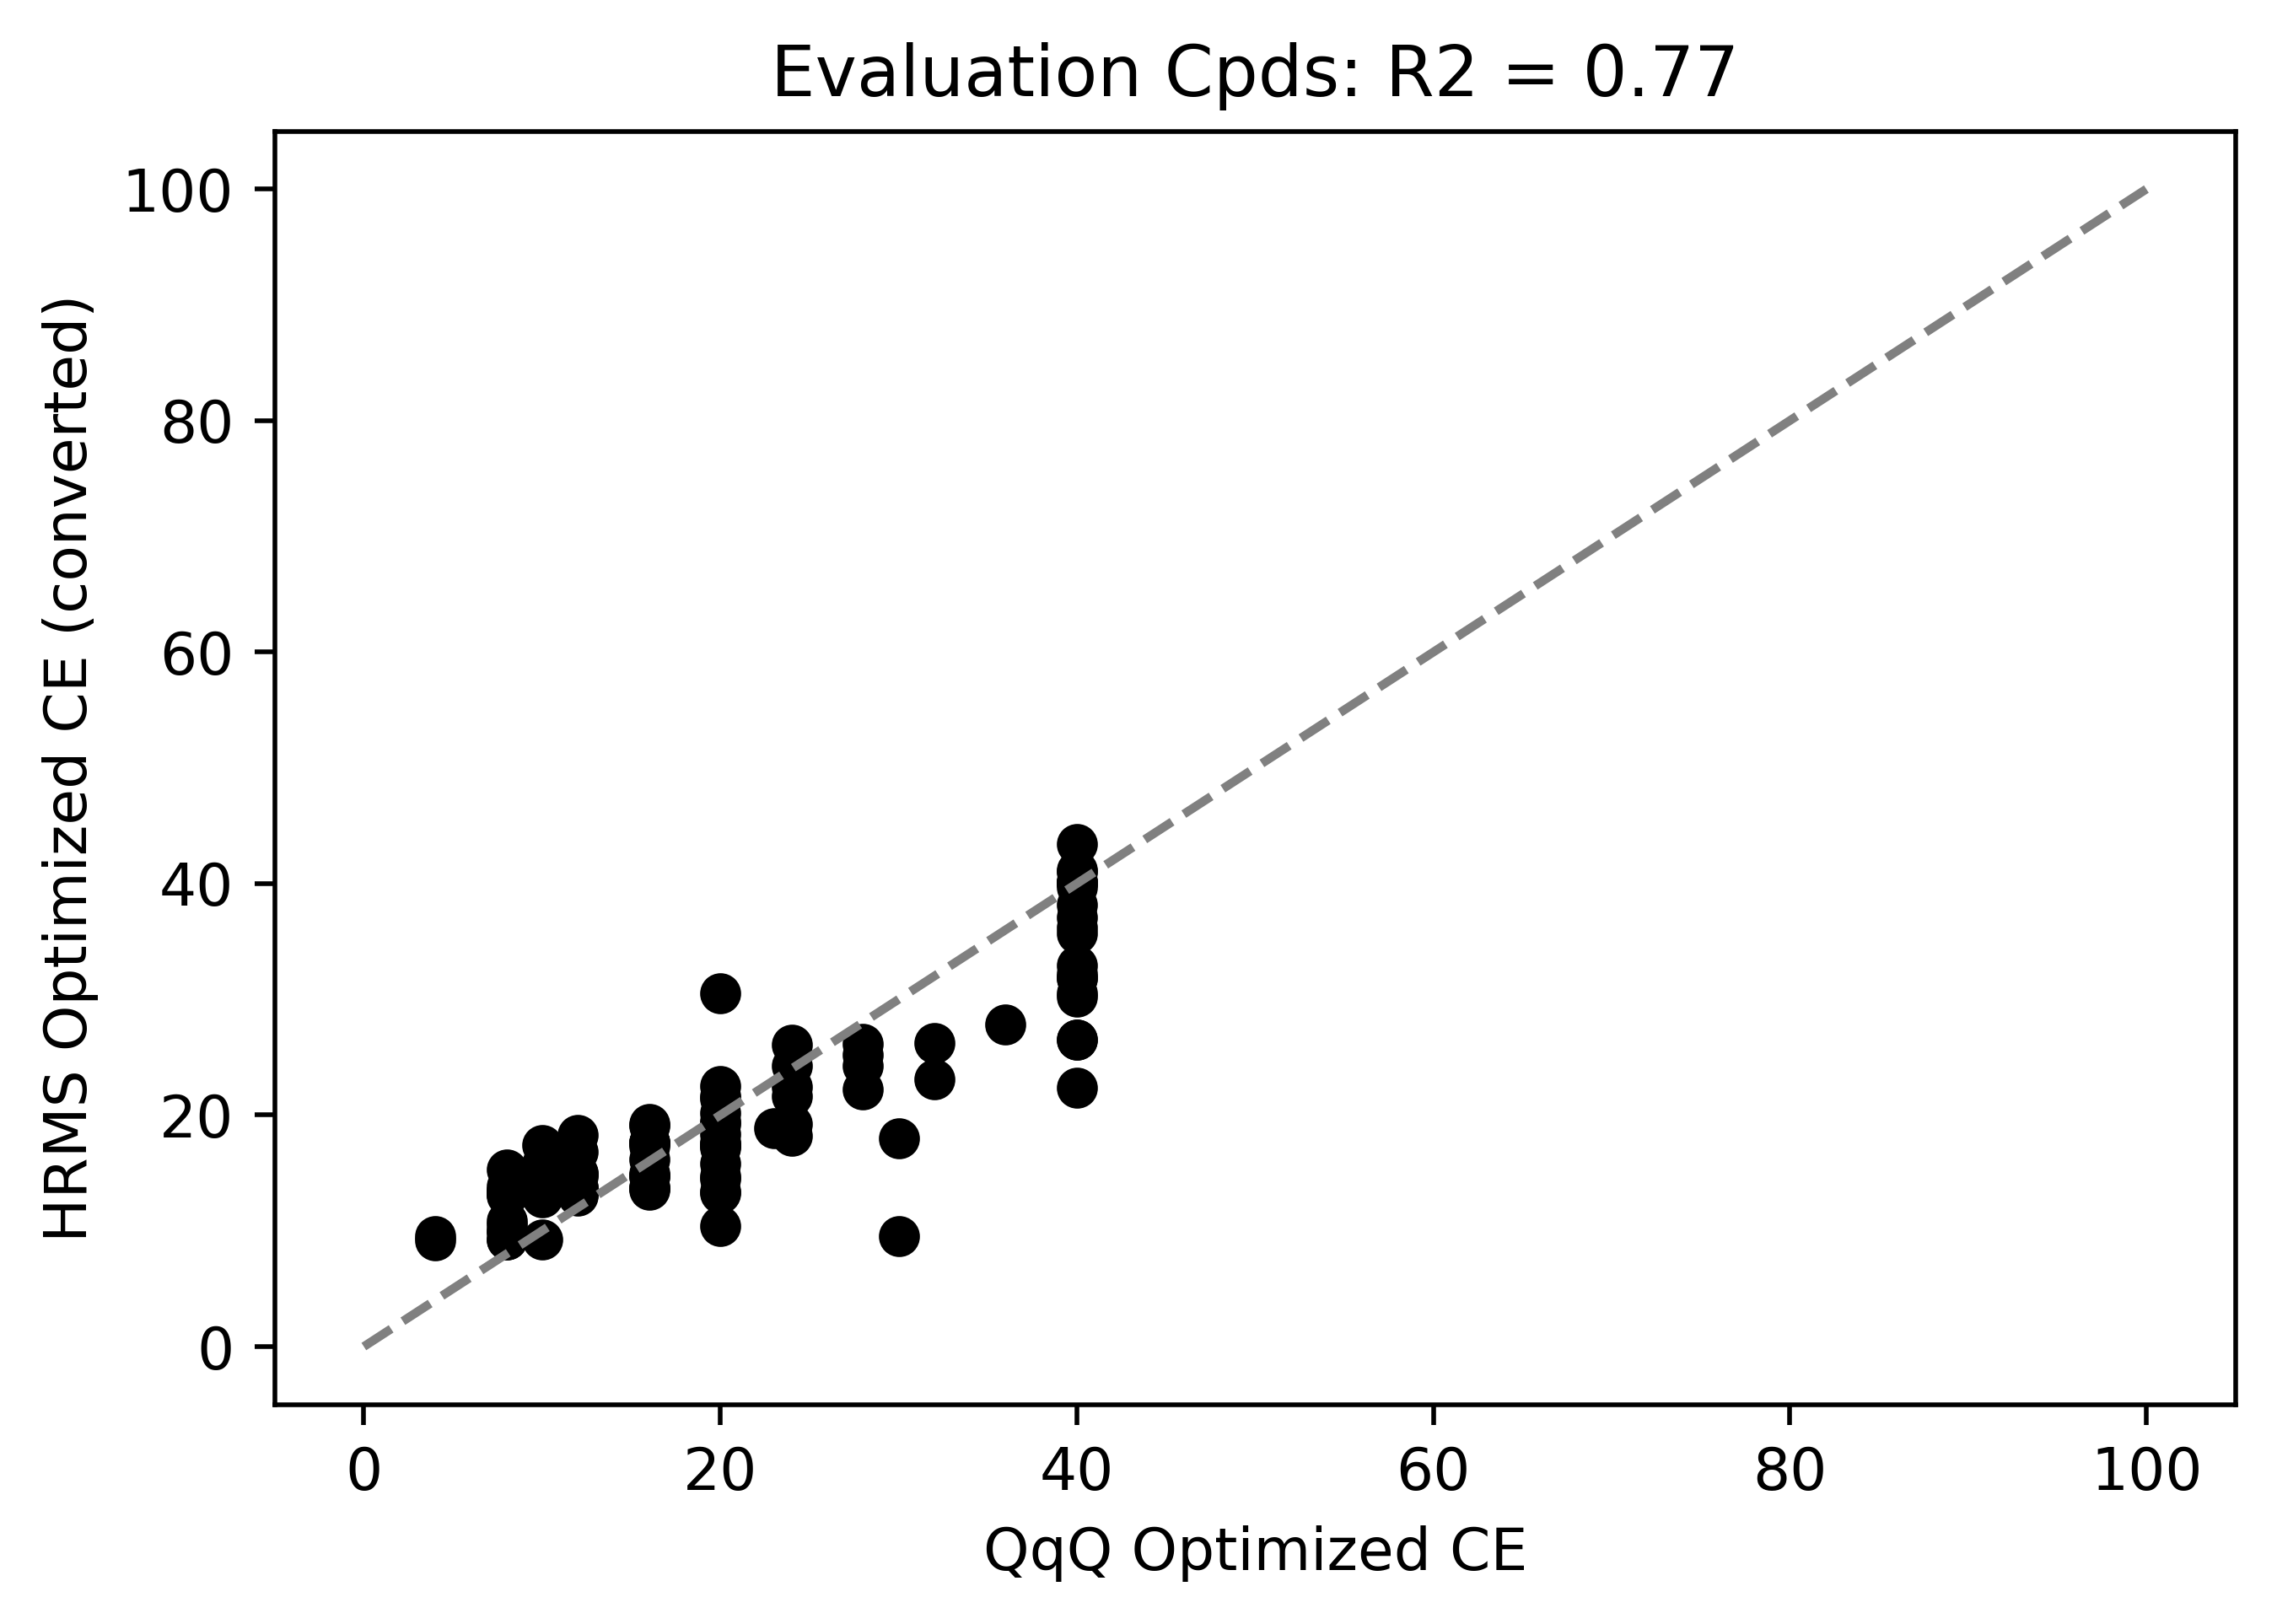

In [9]:
plt.scatter(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"])
plt.title("Evaluation Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("evaluation_scatter_6495.png")

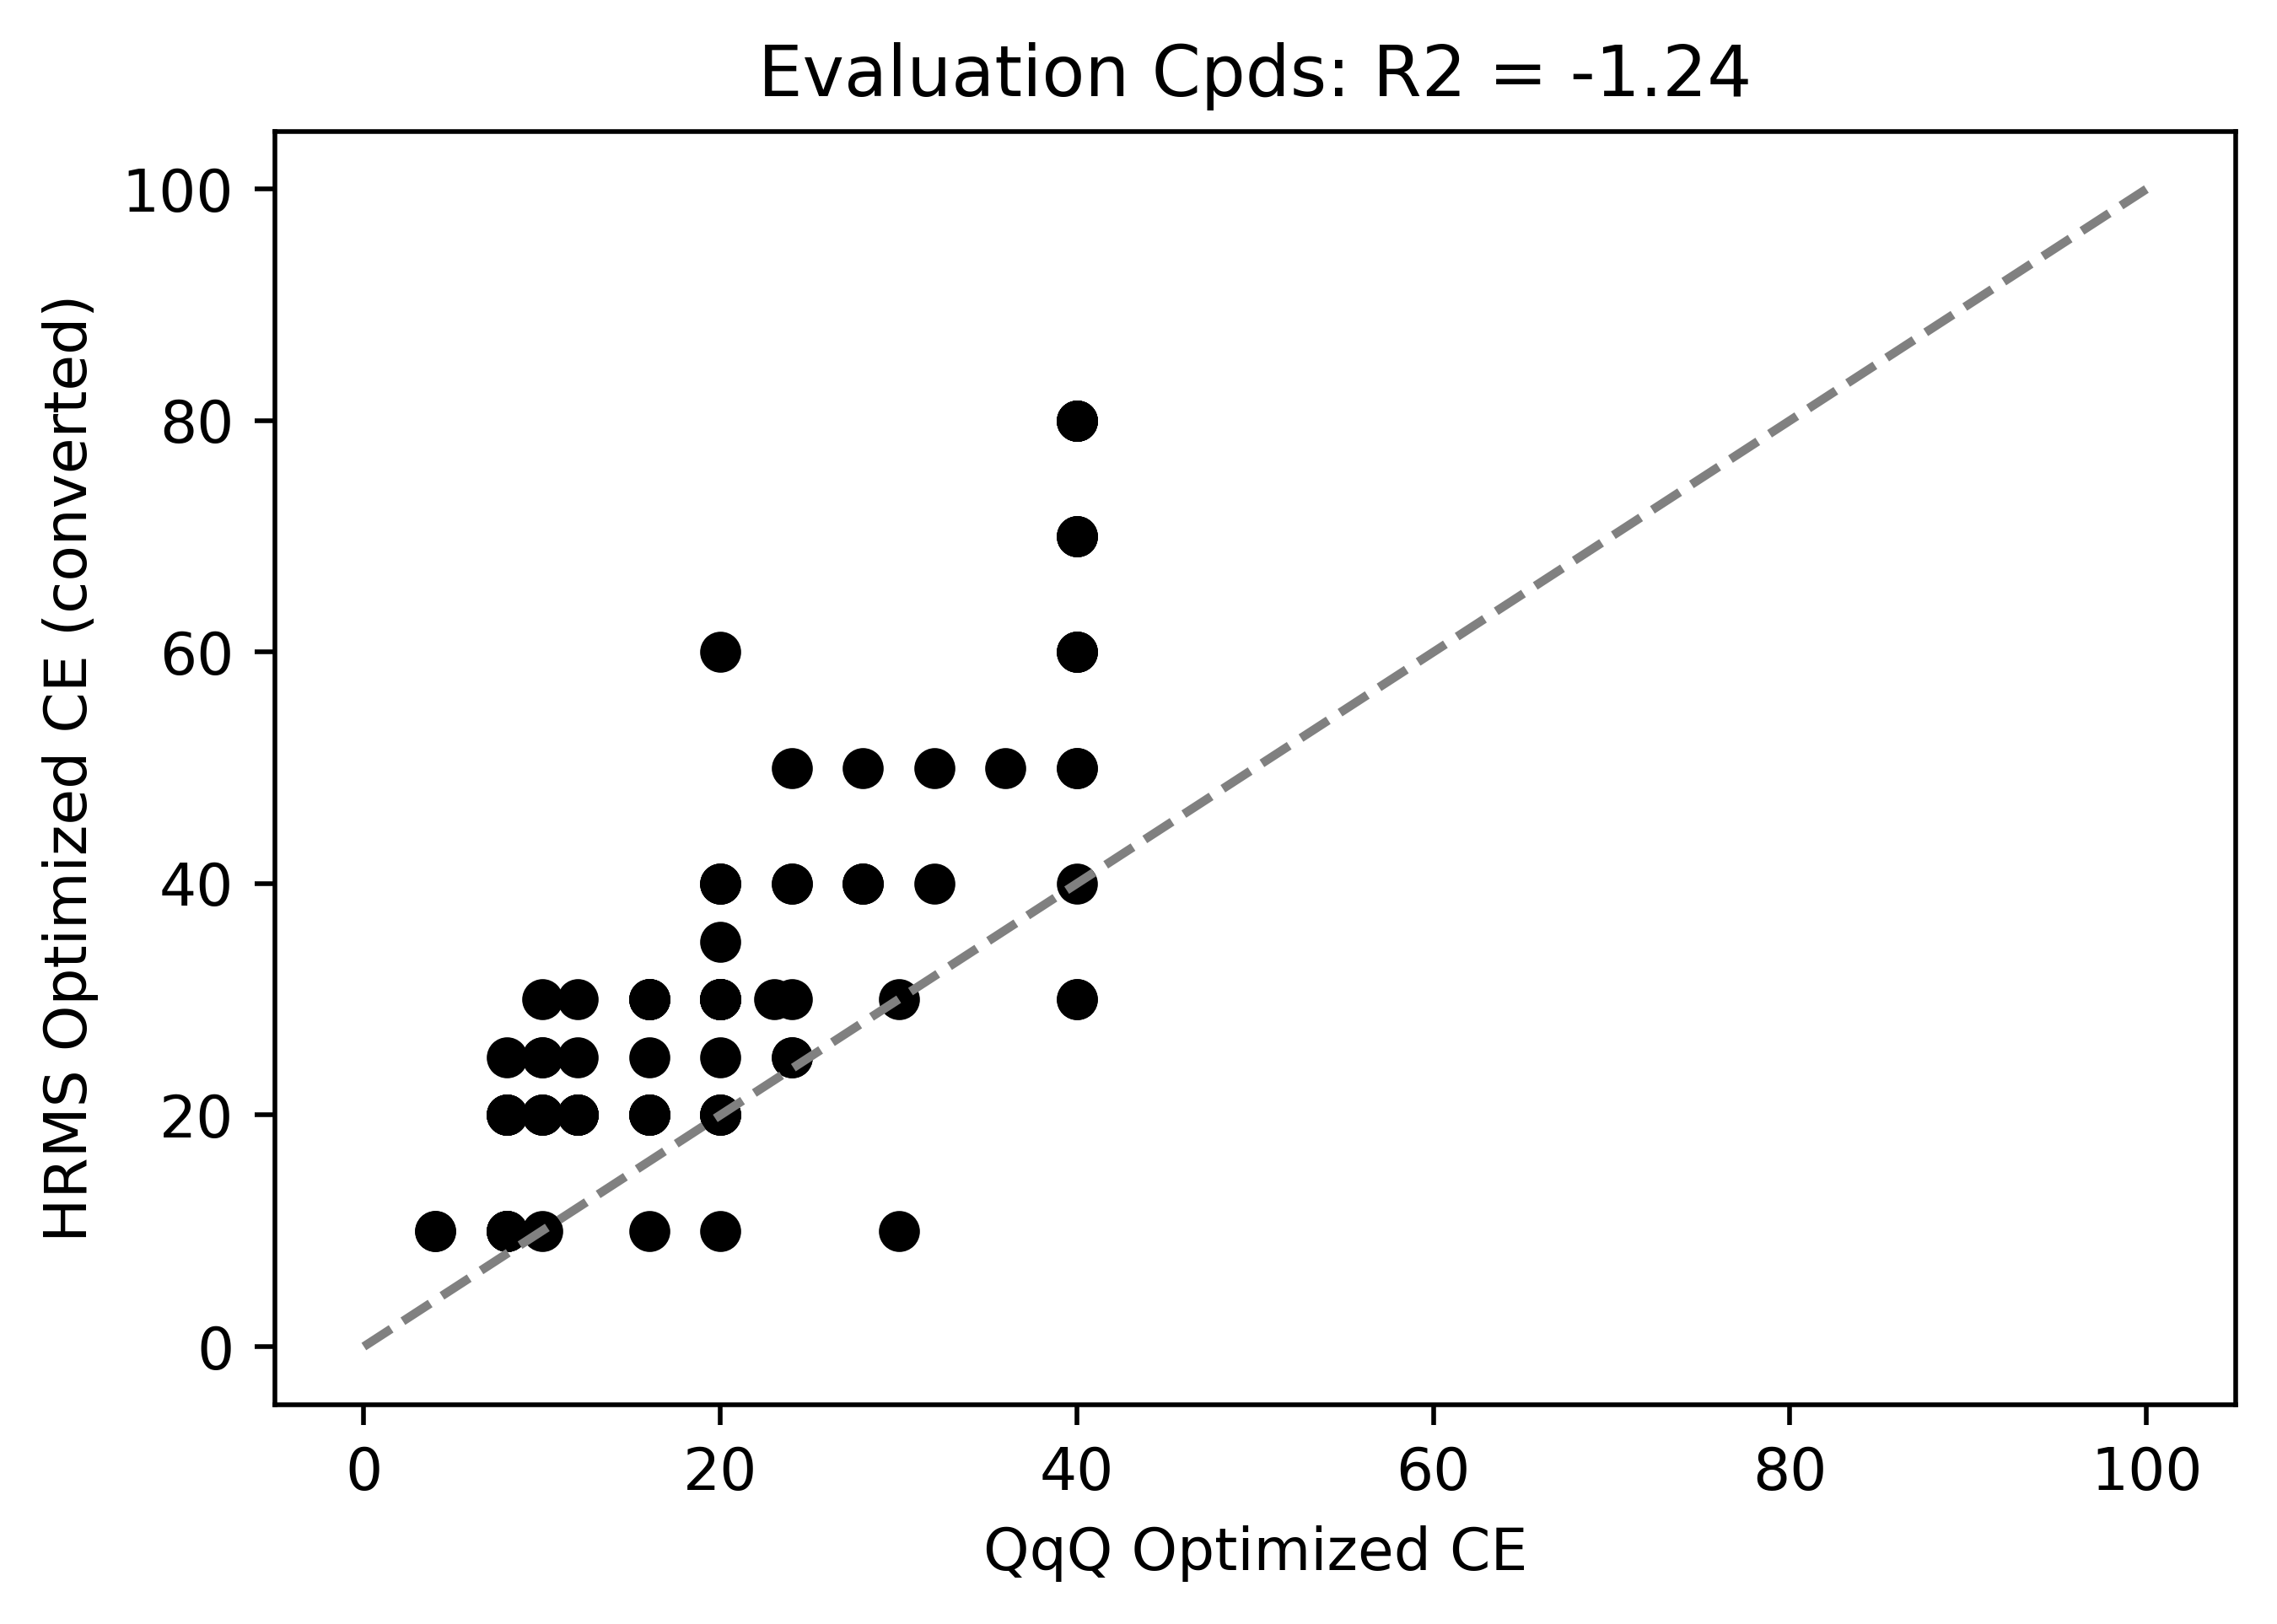

In [10]:
plt.scatter(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (unconverted)"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (unconverted)"])
plt.title("Evaluation Cpds: R2 = "+str(np.round(r2,2)))
plt.savefig("evaluation_scatter_unconverted_6495.png")

In [11]:
poorPerformers = []
for index,row in filt.iterrows():
    if np.abs(row["QqQ Optimized CE"] - row["HRMS Optimized CE (converted)"]) > 10:
        poorPerformers.append(index)
filt.loc[poorPerformers,:]

,Name,Product mz,Charge,QqQ Optimized CE,HRMS Optimized CE (converted),HRMS Optimized CE (unconverted)
55,Acetyl-CoA,461.1,-1,40.0,26.503606,30.0
56,Acetyl-CoA,408.0,-1,40.0,26.503606,30.0
87,G3P,79.0,-1,20.0,30.490222,60.0
94,Indole-3-acetate,130.0,-1,30.0,9.577448,10.0
95,Indole-3-acetate,128.0,-1,30.0,17.969827,30.0
97,Isocitrate,73.0,-1,40.0,22.394328,40.0
